**Import** the *imdb_cleaned.csv* dataset into a Pandas dataframe.

In a prior checkpoint, we analyzed the relationship between Year and Rating and Genre and Rating. Now we would like to visualize those relationships and add the ANOVA results text to the images. Begin by **creating a bar chart** visualizing *Year as the feature* and *Rating as the label*. Use the **barplot()** object of the seaborn package for this.

**ANSWER: Can you tell any differences in rating between any particular years? How?**

Next, **modify the barplot** from the prior problem to reflect the average ratings for **Animated movies compared to non-Animated movies**.

**ANSWER: Does there seem to be a difference in rating between Animated vs. Non-Animated movies? How can you tell?**

Use the code below to create a **boxen** (box and whisker) plot version of the last chart. **ANSWER: Interpret what this communicates to you as the analyst**

In [ ]:
viz = sns.catplot(data=df, x="Year", y="Rating", hue="Animation", kind="boxen");
viz.set_xticklabels(rotation=25);

Although we broke out the individual genres, the unique combination of genres make also be an important indicator of Ratings. Let's compare **four combinations** in particular:

1. Action,Adventure,Sci-Fi
2. Drama
3. Comedy,Romance
4. Animation,Adventure,Comedy

**Use the following code** to split the categories into four groups and create a **bar plot** to view these four.

**ANSWER: Interpret the results meaningfully, explaining that you understand the graph**.

[Text(0, 0, 'Action,Adventure,Sci-Fi'),
 Text(1, 0, 'Drama'),
 Text(2, 0, 'Comedy,Romance'),
 Text(3, 0, 'Animation,Adventure,Comedy')]

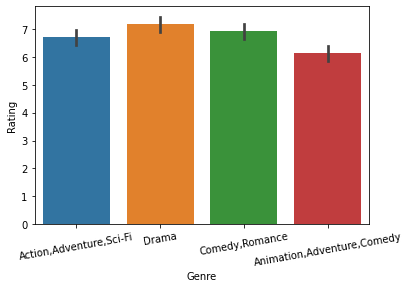

In [70]:
df_reduced = df[df['Genre'].isin(['Action,Adventure,Sci-Fi', 'Drama', 'Comedy,Romance', 'Animation,Adventure,Comedy'])]

viz = sns.barplot(data=df_reduced, x='Genre', y='Rating')
viz.set_xticklabels(rotation=10, labels=['Action,Adventure,Sci-Fi', 'Drama', 'Comedy,Romance', 'Animation,Adventure,Comedy'])

Next, calculate each of the t-test comparisons for every **pairwise comparison and adjust the p-values using the Tukey HSD method**. Print out the results.

**ANSWER: What do the results tell you as the analyst about the ratings and genre? How can you tell? Make sure to reference specific pieces of the output**.

Finally, calculate these t-tests again while making a **Bonferroni adjustment**. Print out the results including the names of the Genre combinations (e.g. 'Animation,Adventure,Comedy - Comedy,Romance'), the t-test, and the p-value of each combination that is below the new p-value threshold. Also, print the threshold. **HINT: Use the code from class and simply change values. BE CAREFUL OF DIFFERENT DATAFRAME NAMES**.

**ANSWER: How do you interpret these results compared to the Tukey results? What's the difference in the analysis?**

Run Tukey and Bonferroni comparisons with Year and Rating. **ANSWER: Is there any advantage or disadvantage to either analysis with this many categories? Are there any differences in results? How do you interpret the results?**